In [1]:
!dir

 Volume in drive C is RAID1_Boot
 Volume Serial Number is 5643-3B56

 Directory of C:\Users\bbintu\bbintu_jackfruit_scripts\XK_ChromatinTracing

01/28/2023  12:03 PM    <DIR>          .
01/28/2023  12:03 PM    <DIR>          ..
01/28/2023  12:03 PM    <DIR>          .ipynb_checkpoints
01/28/2023  12:03 PM                72 Untitled.ipynb
               1 File(s)             72 bytes
               3 Dir(s)  49,552,637,952 bytes free


In [2]:
fld = r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA_Analysis'

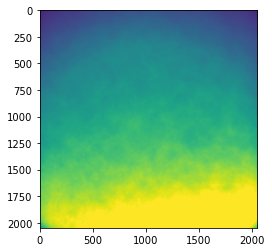

In [17]:
import glob,os,numpy as np
fls = glob.glob(fld+os.sep+'*.npy')
im = np.load(fls[-1])

import matplotlib.pylab as plt
plt.figure()
plt.imshow(im,vmax=np.percentile(im,90))

In [19]:
posDNA = np.loadtxt(r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA_Analysis\posDNA.txt',delimiter=',')
pos = np.loadtxt(r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA_Analysis\pos.txt',delimiter=',')

In [21]:
len(pos),len(posDNA)

(779, 125)

In [22]:
from scipy.spatial.distance import cdist

In [28]:
ifovs = np.argmin(cdist(pos,posDNA),axis=0)

In [29]:
ifovs

array([ 12,  13,  14,  15,  16,  17,  19,  36,  73,  74,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 229, 230, 306,
       307, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 336, 337,
       338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
       351, 352, 353, 354, 357, 358, 359, 360, 361, 362, 363, 364, 365,
       366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378,
       379, 380, 381, 382, 383, 384, 629, 630, 631, 632, 638, 639, 640,
       641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653,
       654, 655, 656, 657, 658, 659, 660, 661], dtype=int64)

In [37]:
ifovDNA=1
from tqdm.notebook import tqdm
for ifovDNA in tqdm(np.arange(len(ifovs))):
    ifov=ifovs[ifovDNA]
    target_fld = r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA\E20230122_R120PVTS32RDNA'
    dest_fld = r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RRNA\H101Q103_104_105'
    tagT = 'Conv_zscan_H3_F_'+str(ifov).zfill(3)
    tagD = 'Conv_zscan_F_'+str(ifovDNA).zfill(3)
    flsT = glob.glob(target_fld+os.sep+tagT+'*')
    
    for flT in flsT:
        flD = flT.replace(target_fld,dest_fld).replace(tagT,tagD)
        #print(flT)
        #print(flD)
        if not os.path.exists(flD):
            shutil.copy2(flT,flD)

  0%|          | 0/125 [00:00<?, ?it/s]

In [32]:
import shutil
?shutil.copy2

{'Q101': 'Cox6a1', 'Q102': 'Ecel1', 'Q103': 'Cbln2'}